In [2]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

# アーランB式 (２つの関数を定義)

In [3]:
#Erlang B式 式をそのまま使ったバージョン
def ErlangB(E,c):
    a = 0
    for i in range(c+1):
        a += E**i/math.factorial(i)
    return E**c/(math.factorial(c)*a)
            
    
#Erlang B式 漸化式を使ったバージョン
def ErlangBRecur(E,c):
    B = 1
    for j in range(c+1):
        B= B*E/(j+B*E)
    return B

**最適なサーバの数を求める関数**

In [4]:
           
#Erlang B式に基づく最適なサーバの数を求める
def OptServer(E,eps):
    c= 1
    p = ErlangBRecur(E,c)
    while (p>eps):
      c = c +1
      p = ErlangBRecur(E,c)
    return c


#Erlang Bに基づく最適なErlang数を求める
def OptErlangNum(c,eps,err):
    E=err 
    p = ErlangBRecur(E,c)
    while (p<eps):
      E = E + err
      p = ErlangBRecur(E,c)
    return E

#Erlang Cに基づく最適なErlang数を求める(与えられたサーバ数cと所望確率epsに対して最大どのくらいのEが許容できるか？)
def OptErlangNumC(c,eps,err):
    E=err 
    p = ErlangC(E,c)
    while (p<eps):
      E = E + err
      p = ErlangC(E,c)
    return E


#Erlang Cの公式（Erlang　C式を直接計算するのは階乗などが含むためErlang B式を介して計算する
def ErlangC(E,c):
    pb =  ErlangBRecur(E,c)
    a = pb*c/(c-E)
    b = 1 + pb*E/(c-E)
    return a/b

#平均系内客数
def MeanSys(ld,mu,c):
    E=ld/mu
    EN = E*(1+ErlangC(E,c)/(c-E))
    return EN

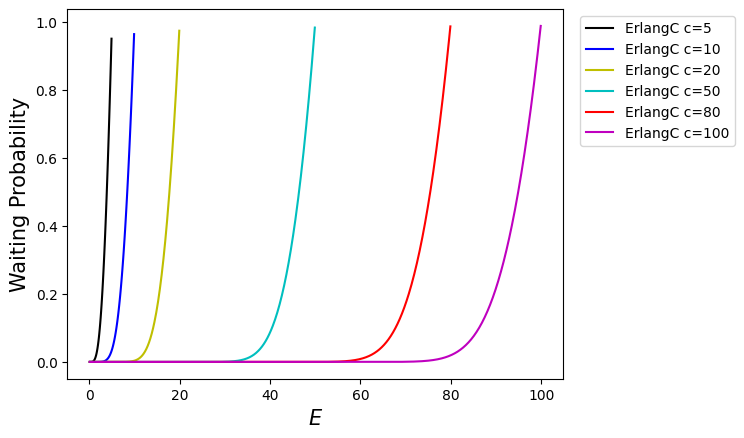

In [17]:
######穴埋め########
c1 = 5
c2 = 10
c3 = 20
c4 = 50
c5 = 80
c6 = 100
X = np.arange(1,100,1)#ｘ軸：np.arange(a,b,c)は[a,b)をc刻みでプロットするという意味　←各自必要に応じて変更する
######穴埋め########





#ｘ軸、y軸用のリストを用意
Y1 = list()#空のリスト(後でx軸の値に応じて代入)
Y2 = list()#空のリスト(後でx軸の値に応じて代入)


clist = [c1,c2,c3,c4,c5,c6]
colorlist = ["k","b","y","c","r","m"]


#リストにx**2の値を格納
for i in range(len(clist)):
    X =  np.arange(0.1,clist[i],0.1)
    for x in X:
        Y1.append(ErlangC(x,clist[i]))        
    plt.plot(X,Y1,label= "ErlangC c="+str(clist[i]),linestyle = "solid",color=colorlist[i])
    Y1 = list()
    

plt.xlabel("$E$",fontsize=15)#x軸
plt.ylabel("Waiting Probability",fontsize=15)#y軸
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,))#凡例の出力(labelを記載しない場合は削除)
plt.savefig('task1.png',bbox_inches='tight')#グラフを保存


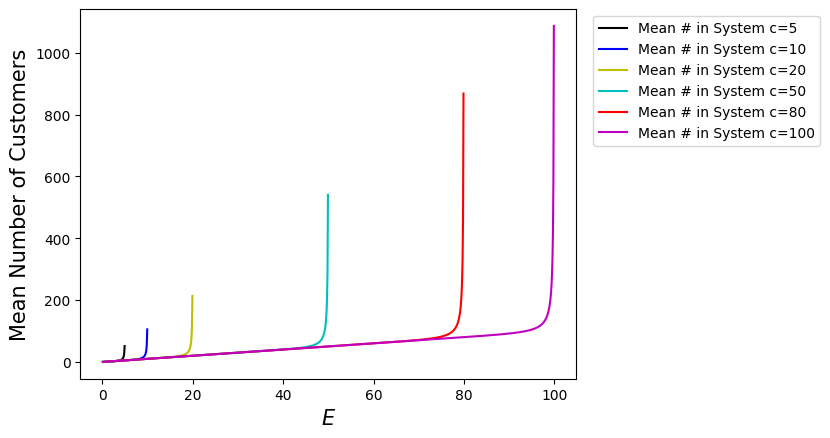

In [16]:
######穴埋め########
c1 = 5
c2 = 10
c3 = 20
c4 = 50
c5 = 80
c6 = 100
X = np.arange(1,100,1)#ｘ軸：np.arange(a,b,c)は[a,b)をc刻みでプロットするという意味　←各自必要に応じて変更する
######穴埋め########





#ｘ軸、y軸用のリストを用意
Y1 = list()#空のリスト(後でx軸の値に応じて代入)
Y2 = list()#空のリスト(後でx軸の値に応じて代入)


clist = [c1,c2,c3,c4,c5,c6]
colorlist = ["k","b","y","c","r","m"]


#リストにx**2の値を格納
for i in range(len(clist)):
    X =  np.arange(0.1,clist[i],0.1)
    for x in X:
        Y2.append(MeanSys(x,1,clist[i]))
    plt.plot(X,Y2,label= "Mean # in System c="+str(clist[i]),linestyle = "solid",color=colorlist[i])
    Y2 = list()



plt.xlabel("$E$",fontsize=15)#x軸
plt.ylabel("Mean Number of Customers",fontsize=15)#y軸
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,))#凡例の出力(labelを記載しない場合は削除)
plt.savefig('task3_1.png',bbox_inches='tight')#グラフを保存


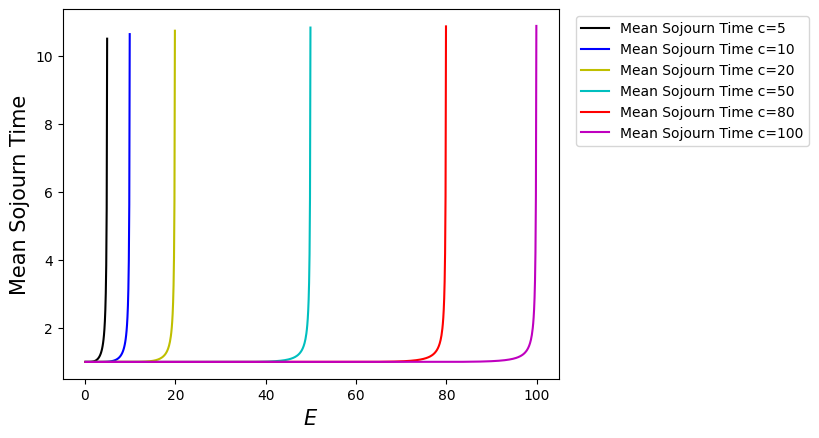

In [18]:
#ｘ軸、y軸用のリストを用意
Y1 = list()#空のリスト(後でx軸の値に応じて代入)
Y2 = list()#空のリスト(後でx軸の値に応じて代入)


clist = [c1,c2,c3,c4,c5,c6]
colorlist = ["k","b","y","c","r","m"]


#リストにx**2の値を格納
for i in range(len(clist)):
    X =  np.arange(0.1,clist[i],0.1)
    for x in X:
        Y2.append(MeanSys(x,1,clist[i])/x)
    plt.plot(X,Y2,label= "Mean Sojourn Time c="+str(clist[i]),linestyle = "solid",color=colorlist[i])
    Y2 = list()



plt.xlabel("$E$",fontsize=15)#x軸
plt.ylabel("Mean Sojourn Time",fontsize=15)#y軸
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,))#凡例の出力(labelを記載しない場合は削除)
plt.savefig('task3_2.png',bbox_inches='tight')#グラフを保存


In [8]:
#E=50のときに待つ確率を1%未満にする最低のサーバー数
c = 51
while ErlangC(50,c) >= 0.01:
    c += 1
print(c)
print(ErlangC(50,c))

68
0.009943697751928698


In [ ]:
def cal_min_c(E,p):
    c = E + 1
    while ErlangC(E,c) >= p:
        c += 1
    return c

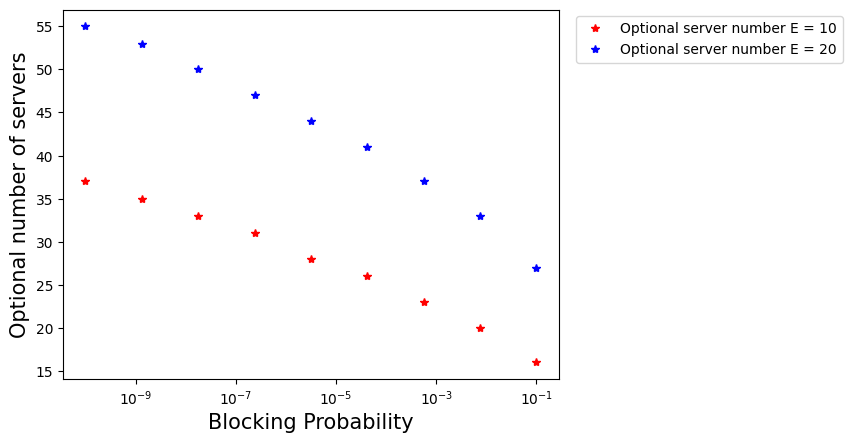

In [19]:
######穴埋め########
c1 = 1
X = np.logspace(-10, -1, num=9)
######穴埋め########

#ｘ軸、y軸用のリストを用意
Y1 = list()#空のリスト(後でx軸の値に応じて代入)
Y2 = list()#空のリスト(後でx軸の値に応じて代入)



colorlist = ["r","b"]


#リストにx**2の値を格納
for x in X:
    Y1.append(cal_min_c(10,x))
plt.plot(X,Y1,label= "Optional server number E = 10",linestyle = "None",marker = "*",color=colorlist[0])
Y1 = list()

for x in X:
    Y2.append(cal_min_c(20,x))
plt.plot(X,Y2,label= "Optional server number E = 20",linestyle = "None",marker="*",color=colorlist[1])
Y2 = list()


plt.xscale("log")#x軸を対数表示
plt.xlabel("Blocking Probability",fontsize=15)#x軸
plt.ylabel("Optional number of servers",fontsize=15)#y軸
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,))#凡例の出力(labelを記載しない場合は削除)
plt.savefig('task4.png',bbox_inches='tight')#グラフを保存
